In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [2]:
fraud = pd.read_csv("Fraud_check.csv")
fraud
Fraud =fraud.rename(columns={"Marital.Status":'MaritalStatus','Taxable.Income':'Taxable_Income',"City.Population":'CityPopulation','Work.Experience':'WorkExperience'})
Fraud 

,Undergrad,MaritalStatus,Taxable_Income,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
Data = pd.get_dummies(Fraud)
Data 

,Taxable_Income,CityPopulation,WorkExperience,Undergrad_NO,Undergrad_YES,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [4]:
df = Data.drop(['MaritalStatus_Single', 'MaritalStatus_Divorced', 'Undergrad_NO', 'Urban_NO'], axis=1)

In [5]:
df.loc[df['Taxable_Income'] <= 30000 , 'Category'] = 'Risky'  
df.loc[df['Taxable_Income'] >= 30000 , 'Category'] = 'Good'  
df1= df.drop(columns='Taxable_Income')
df1 

,CityPopulation,WorkExperience,Undergrad_YES,MaritalStatus_Married,Urban_YES,Category
0,50047,10,0,0,1,Good
1,134075,18,1,0,1,Good
2,160205,30,0,1,1,Good
3,193264,15,1,0,1,Good
4,27533,28,0,1,0,Good
...,...,...,...,...,...,...
595,39492,7,1,0,1,Good
596,55369,2,1,0,1,Good
597,154058,0,0,0,1,Good
598,180083,17,1,1,0,Good


In [6]:
DF = df1.rename(columns={'Undergrad_YES':'Undergrad','MaritalStatus_Married':'MaritalStatus','Urban_YES':'Urban','Category':'Taxable_Income'})
DF 

,CityPopulation,WorkExperience,Undergrad,MaritalStatus,Urban,Taxable_Income
0,50047,10,0,0,1,Good
1,134075,18,1,0,1,Good
2,160205,30,0,1,1,Good
3,193264,15,1,0,1,Good
4,27533,28,0,1,0,Good
...,...,...,...,...,...,...
595,39492,7,1,0,1,Good
596,55369,2,1,0,1,Good
597,154058,0,0,0,1,Good
598,180083,17,1,1,0,Good


In [7]:
DF.Taxable_Income.value_counts()

Good     476
Risky    124
Name: Taxable_Income, dtype: int64

In [8]:
label_encoder = preprocessing.LabelEncoder()
DF['Taxable_Income']= label_encoder.fit_transform(DF['Taxable_Income']) 

In [9]:
x =  DF.iloc[:,0:5]
x

,CityPopulation,WorkExperience,Undergrad,MaritalStatus,Urban
0,50047,10,0,0,1
1,134075,18,1,0,1
2,160205,30,0,1,1
3,193264,15,1,0,1
4,27533,28,0,1,0
...,...,...,...,...,...
595,39492,7,1,0,1
596,55369,2,1,0,1
597,154058,0,0,0,1
598,180083,17,1,1,0


In [10]:
y = DF['Taxable_Income']
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable_Income, Length: 600, dtype: int32

In [11]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=50) 

# Building Decision Tree Classifier using Entropy Criteria

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(111.60000000000001, 190.26, 'X[0] <= 28297.0\nentropy = 0.75\nsamples = 480\nvalue = [377, 103]'),
 Text(55.800000000000004, 135.9, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(167.4, 135.9, 'X[0] <= 28452.5\nentropy = 0.755\nsamples = 474\nvalue = [371, 103]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.20000000000002, 81.53999999999999, 'X[0] <= 28990.0\nentropy = 0.752\nsamples = 473\nvalue = [371, 102]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(279.0, 27.180000000000007, 'entropy = 0.758\nsamples = 466\nvalue = [364, 102]')]

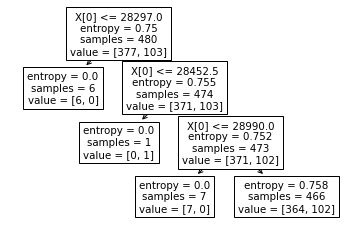

In [13]:
#PLot the decision tree
tree.plot_tree(model)


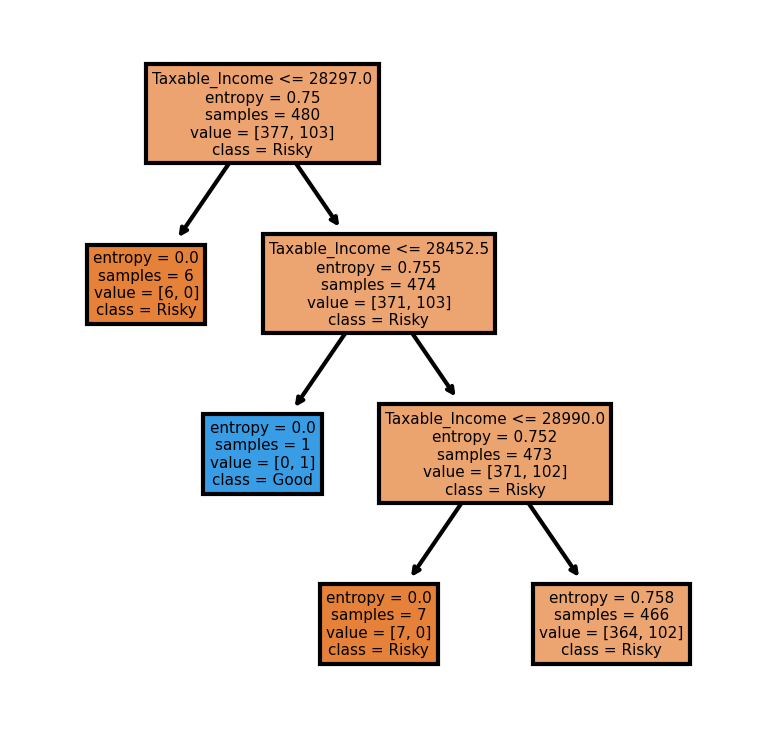

In [14]:
fn=['Taxable_Income','CityPopulation','WorkExperience','Undergrad','MaritalStatus','Urban']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [15]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

0    119
1      1
dtype: int64

In [16]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Taxable_Income,,
0,98,1
1,21,0


In [17]:
np.mean(preds==y_test)

0.8166666666666667


# Building Decision Tree Classifier (CART) using Gini Criteria

In [18]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [19]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

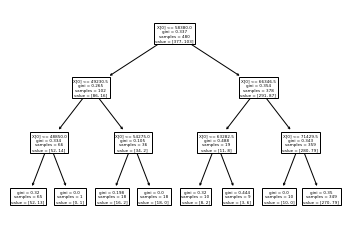

In [20]:
tree.plot_tree(model_gini);


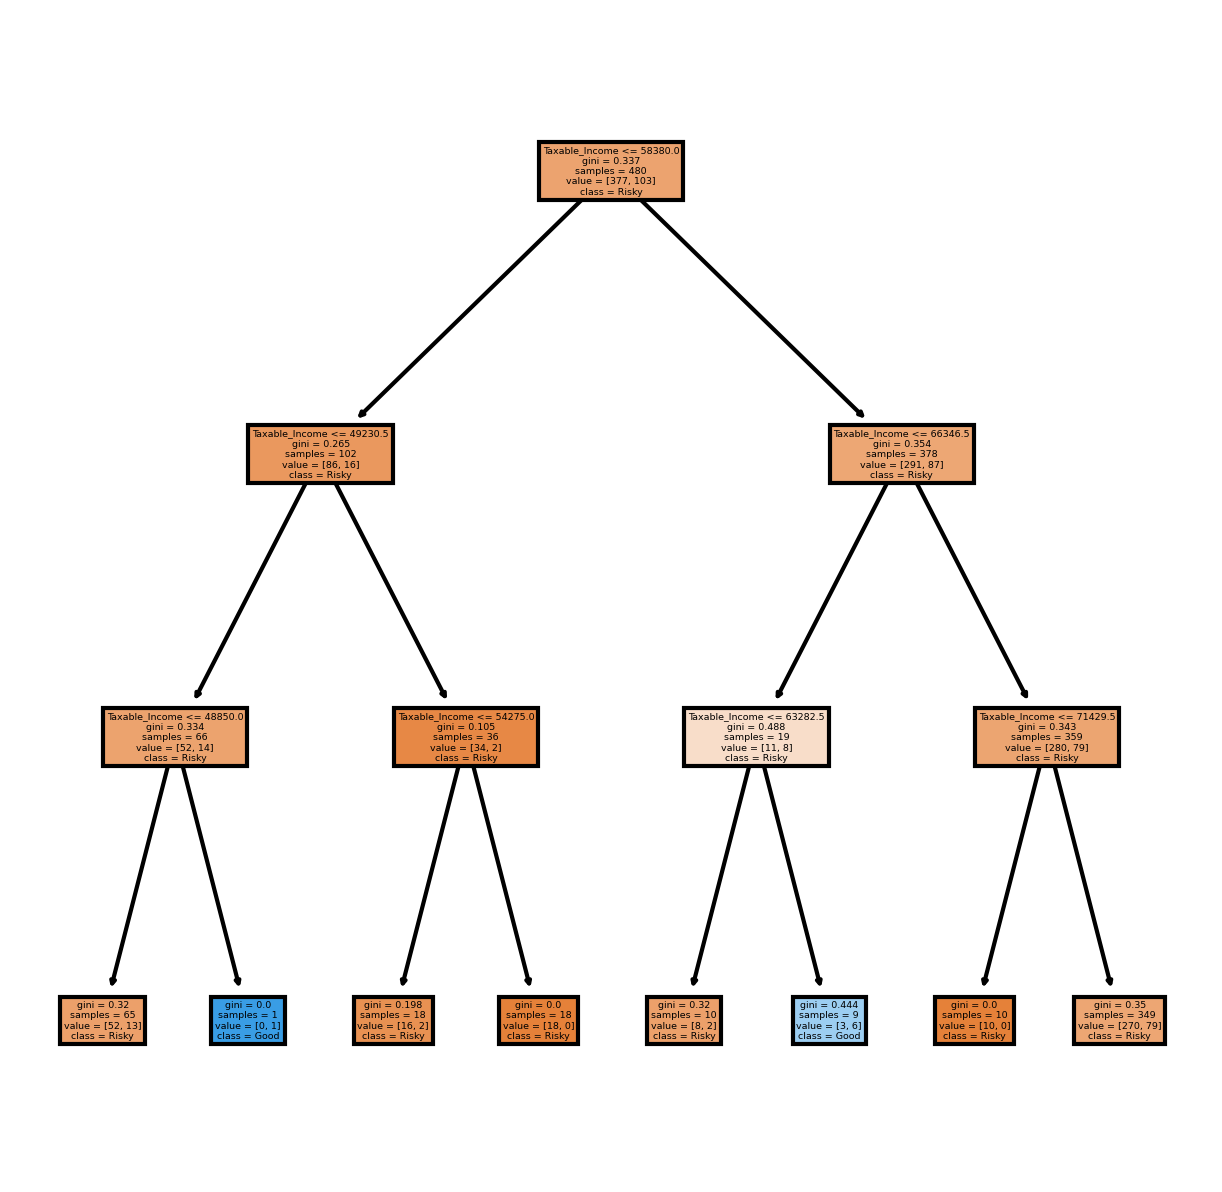

In [21]:
fn2=['Taxable_Income','CityPopulation','WorkExperience','Undergrad','MaritalStatus','Urban']
cn2=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn2, 
               class_names=cn2,
               filled = True); 

In [22]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test) 

0.8166666666666667